# Coding practice \#4

files needed = (`airline_products_2017.csv`, `privatelabel.xlsx`)

Answer the questions below in a Jupyter notebook. You can modify this notebook by adding cells with your answers. It is recommended to try it on your own to practice the material in advance the exams.

# Exercise 0: Cui, Minnie
Replace 'Last, First' above with your actual name. Enter it as: last name, first name.

# Exercise 1: groupby and more bar charts

The file `airline_products_2017.csv` contains some data used in the first chapter of Dennis's dissertation. The data are taken from the Airline Origin & Destination Survey (DB1B) but has been substantially cleaned. Thanks Dennis! \[Dennis was the TA for this class in 2018. He is now working at Bates White Consulting. The course TAs have contributed a lot to the class.\] 

In particular, the data contain information on a sample of airline itineraries for flights departing from one of seven airports in the San Francisco Bay region and arriving at one of the other large cities in the United States in the second quarter of 2017. Each observation contains information on the origin airport, destination airport, airline,  nonstop or connecting itinerary type, average one-way fare in dollars, and distance between the origin and destination (in miles).

In this exercise, we will make a simple scatterplot and then repeatedly use the `.groupby()` method to create several bar charts. Follow the instructions below.

### Part (a):

1. Load the data as a Pandas data frame and keep only the nonstop flights. 
2. Make a scatterplot of distance (x axis) against prices (y axis). 
3. Make the scatterpoints blue circles that are not filled in. 

You'll notice a strange gap in the distance data between 1,000 and 1,500 miles&mdash;it's called "flyover country" for a reason!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

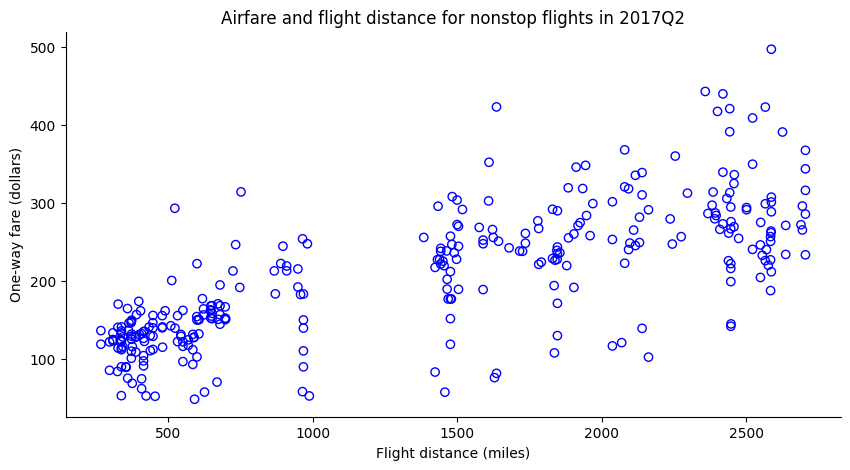

In [2]:
# Load data
flights = pd.read_csv('airline_products_2017.csv')

# Keep only nonstop flights:
flights = flights[flights['nonstop'] == 1]


# Scatterplot with regression line. Notice the syntax for the extra options in .regplot().
fig0, ax0 = plt.subplots(figsize=(10,5)) 
ax0.scatter(flights['distance'], flights['fare'], color='blue', facecolor='none')

ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)

ax0.set_title("Airfare and flight distance for nonstop flights in 2017Q2")
ax0.set_xlabel("Flight distance (miles)")
ax0.set_ylabel("One-way fare (dollars)")

plt.show()

### Part (b):

1. Use the `.groupby()` method to obtain the **median** fare for nonstop flights for each airline. Print the median fares to the screen.

In [3]:
# Compute median fares by airline:
by_airline = flights.groupby('airline')['fare'].median()
by_airline

airline
Alaska Airlines         140.300230
Allegiant Air            63.637638
American Airlines       221.730330
Delta Air Lines         167.254630
Frontier Airlines       109.993130
JetBlue Airways         240.673565
Skywest Airlines        101.370130
Southwest Airlines      222.615730
Spirit Air Lines         92.401984
Sun Country Airlines    189.357150
United Airlines         287.500950
Virgin America          240.048885
Name: fare, dtype: float64

2. Make a bar chart displaying the median fare for American Airlines, Delta Air Lines, Southwest Airlines, and United Airlines. Give the chart appropriate labels etc. and make it look nice. 

Contrary to intuition, Delta appears to have much lower fares than Southwest!

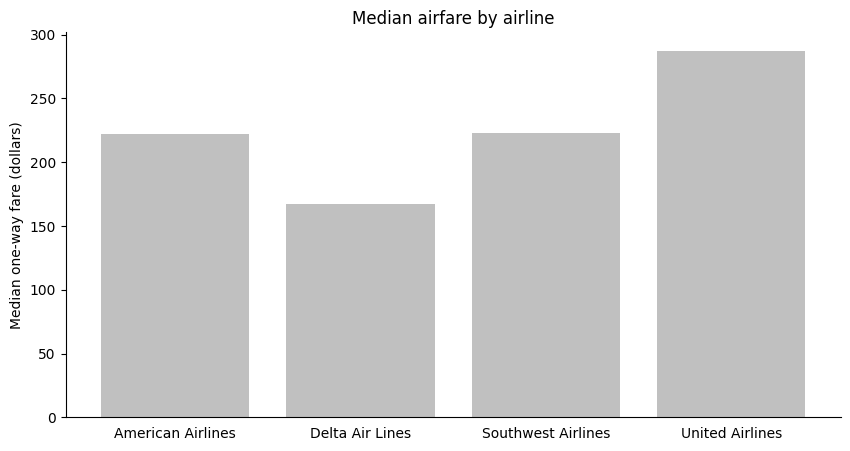

In [4]:
# List of big 4 airlines of interest
airline_list = ['American Airlines', 'Delta Air Lines', 'Southwest Airlines', 'United Airlines']

# Bar chart of median fares by airline
fig1, ax1 = plt.subplots(figsize=(10,5)) 

# only plot the rows in 'airline_list'
ax1.bar(by_airline.loc[airline_list].index, by_airline.loc[airline_list], color='silver')

ax1.set_title('Median airfare by airline')
ax1.set_ylabel('Median one-way fare (dollars)')

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.tick_params(bottom=False)            # Kill the ticks on the categorical axis

plt.show()


### Part (c):

The bar chart above might be misleading, because different airlines may fly to different cities that are different distances from San Francisco (a *composition effect*), so we might be confusing variation in fares across airlines with variation in fares for flights of different distances. Let's try to fix this:

   1. On the original data frame of non-stop flights, use the `.cut()` method to create distance bins 500 miles in width (starting at 0 and ending at 3000). 
   
   2. Use the `.groupby()` method to obtain the median airfare by (distance-bin, airline) pair. 

In [5]:
# Create distance bins:
#bins = [0,500,1000,1500,2000,2500,3000]

# Use .cut() function to cut the flight distance data
flights['distance_bins'] = pd.cut(flights['distance'],list(range(0,3001,500)))

# Calculate the median fare by airline and distance bin and reset the index
by_airline_and_dist = flights.groupby(['distance_bins','airline'], observed=False)['fare'].median()

by_airline_and_dist.head(15)


distance_bins  airline             
(0, 500]       Alaska Airlines         117.844825
               Allegiant Air            69.247496
               American Airlines       133.903600
               Delta Air Lines         125.328650
               Frontier Airlines              NaN
               JetBlue Airways          90.325570
               Skywest Airlines        101.370130
               Southwest Airlines      130.055645
               Spirit Air Lines         57.883075
               Sun Country Airlines           NaN
               United Airlines         147.447205
               Virgin America          133.838050
(500, 1000]    Alaska Airlines         136.267540
               Allegiant Air            55.540851
               American Airlines       155.792895
Name: fare, dtype: float64

3. Then reset the index on the resulting series. Your data should be *long* at this point.


In [6]:
by_airline_and_dist = by_airline_and_dist.reset_index()

by_airline_and_dist.head(10)

,distance_bins,airline,fare
0,"(0, 500]",Alaska Airlines,117.844825
1,"(0, 500]",Allegiant Air,69.247496
2,"(0, 500]",American Airlines,133.903600
3,"(0, 500]",Delta Air Lines,125.328650
4,"(0, 500]",Frontier Airlines,NaN
5,"(0, 500]",JetBlue Airways,90.325570
6,"(0, 500]",Skywest Airlines,101.370130
7,"(0, 500]",Southwest Airlines,130.055645
8,"(0, 500]",Spirit Air Lines,57.883075
9,"(0, 500]",Sun Country Airlines,NaN


   4. Keep the observations for the 4 airlines discussed above: American Airlines, Delta Air Lines, Southwest Airlines, and United Airlines.
   5. Covert the distance bin column to a string instead of an Interval object type. \[try `astype( )`\]
  

In [7]:
# Selected desired columns: just the 4 large airlines used above:
by_airline_and_dist = by_airline_and_dist[by_airline_and_dist['airline'].isin(airline_list)].copy()

# What kind of object is a distance_bin?
print('The distance_bins type is', type(by_airline_and_dist.loc[2,'distance_bins']) )

# Convert the distnace_bins to strings rather than categoricals:
by_airline_and_dist['distance_bins'] = by_airline_and_dist['distance_bins'].astype('str')

# What kind of object is a distance_bin?
print('The distance_bins type is', type(by_airline_and_dist.loc[2,'distance_bins']) )

The distance_bins type is <class 'pandas._libs.interval.Interval'>
The distance_bins type is <class 'str'>


 6. Now let's create two **horizontal** bar charts using the subplot method. The first shows the median fare by airline for trips between 0 and 500 miles. The second does so for trips between 2,000 and 2,500 miles. 
 
The horizontal axis should show the median fare, the vertical axis should have the airline names as labels. Make the other aspects of the figure look nice. My figure looks like [this](http://badgerdata.org/images/fares.png). 

The resulting chart should show that Delta has the lowest fares for the flights between 0 and 500 miles but the highest fares for flights between 2,000 and 2,500 miles.

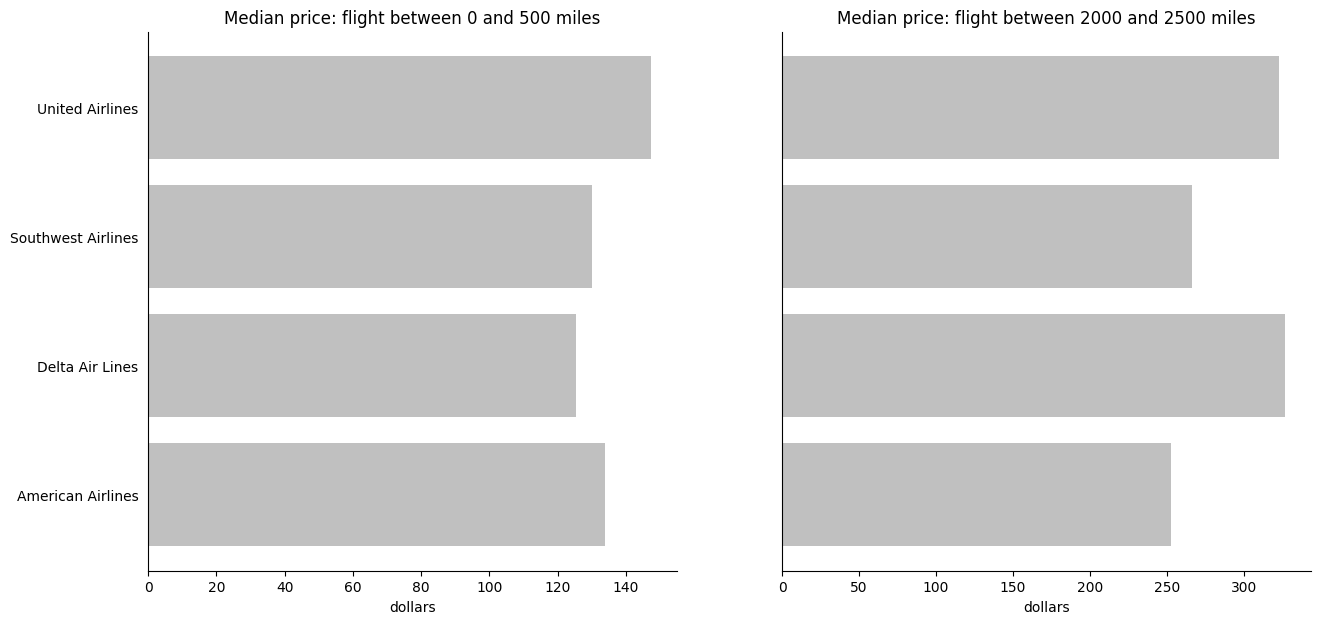

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(15,7)) 


df1 = by_airline_and_dist[by_airline_and_dist['distance_bins']=='(0, 500]']
df2 = by_airline_and_dist[by_airline_and_dist['distance_bins']=='(2000, 2500]']

ax[0].barh(df1['airline'], df1['fare'], color='silver')
ax[1].barh(df2['airline'], df2['fare'], color='silver')

for a in ax:
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)
    
    a.tick_params(axis='y', which='both', left=False, right=False)
    
    a.set_xlabel('dollars')
    
ax[1].set_yticklabels([])

         

ax[0].set_title('Median price: flight between 0 and 500 miles')
ax[1].set_title('Median price: flight between 2000 and 2500 miles')

plt.savefig('fares.png')

plt.show()

### Part (d): Challenging
1. Create a single *grouped (horizontal) bar chart* with price in dollars on the x axis and the names of the airlines on the y axis. Plot six bars for each airline, grouped by airline. My figure looks like [this](http://badgerdata.org/images/fares_stacked.png)). I am not happy with my colors&mdash;I need to work on it some more.

I used seaborn to do this but you are welcome to use whatever method you prefer. 

In [9]:
import seaborn as sns

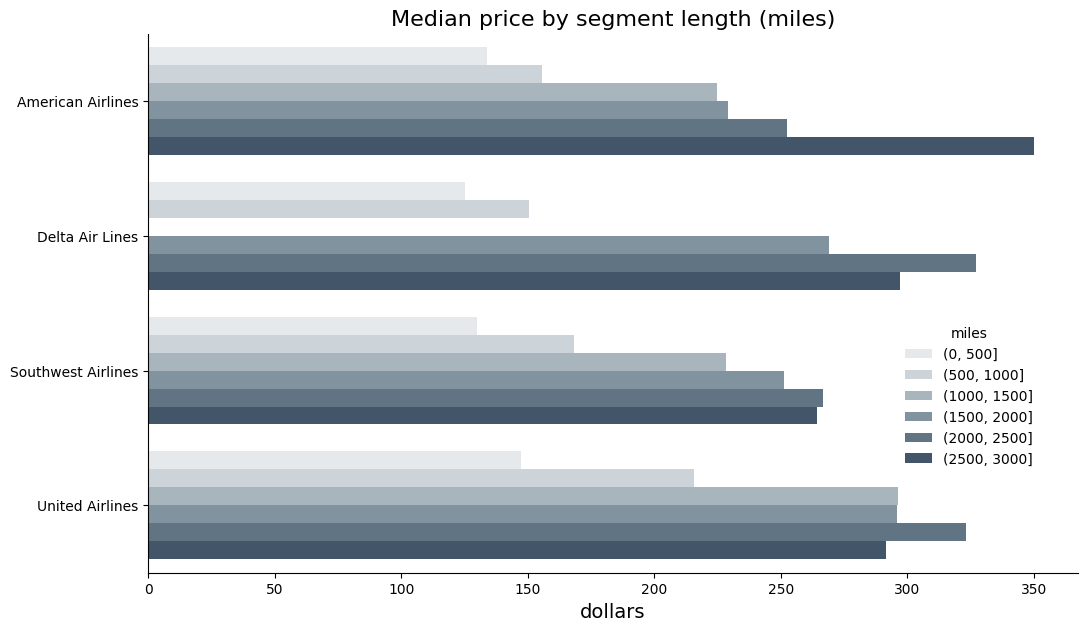

In [10]:
fig, ax = plt.subplots(figsize=(12,7))

sns.barplot(y="airline", x="fare", hue="distance_bins", data=by_airline_and_dist, ax=ax, palette='Blues', saturation=0.25)
ax.set_ylabel('')
ax.set_xlabel('dollars', fontsize=14)
ax.set_title('Median price by segment length (miles)', fontsize=16)

# I'm controling the legend placement here...
ax.legend(frameon=False, ncol=1, loc='upper left', bbox_to_anchor=(0.8, 0.48), title='miles')
sns.despine()

plt.savefig('fares_stacked.png')

# Exercise 2: reshaping  and analyzing times series plots

The file `privatelabel.xlsx` contains some data on the share of private label grocery items versus branded items purchased in a large grocery chain in Canada from 2018 Q1-2023 Q1. The data contains spending by two income groups &ndash; households earning $\$75,000-\$79,999$ a year and households earning $\$85,000-\$89,999$ a year. 

*Private label* items are items that belong to the grocery chain's in-house label (e.g., Walmart's Great Value or Costco's Kirkland Signature). *Branded* items are items whose brands are stocked by the grocery chain but are not produced by the chain (e.g., Coca Cola sold in a Walmart or Costco). Private label items are typically cheaper than branded items. 

This dataset is constructed from scanner data. This means that every purchase observed was selected by a household. Thus, scanner data is not a representative sample of the products in the store. Since households are selecting the items observed, we may not be observing the prices and purchasing decisions on items in the grocery store that are very expensive or very low quality. Thus, especially during a period of high inflation, we may see that price series generated from scanner data be more volatile than a price series using the prices of all products in a grocery store. 

In this exercise, we'll study how the share of private label items purchased by these two groups varies over time and think about what this can mean for consumers during the pandemic. Follow the instructions below.

### Part (a):

1. Load the data as a Pandas DataFrame (the data is in a sheet named "data"). 
2. Use the year and month data to create a datetime variable in your DataFrame. 
3. Drop the year and month variables. 
3. Print the first 10 observations.

In [11]:
# Load data 
privatelabel_data = pd.read_excel('privatelabel.xlsx', sheet_name="data")

# Make datetime variable
privatelabel_data['date'] = pd.to_datetime(privatelabel_data['year'].astype(str) + '-' + privatelabel_data['month'].astype(str))

# Drop month and year
privatelabel_data = privatelabel_data[['date', 'share_privatelabel', 'income']]

# Print first 10 observations
display(privatelabel_data.head(10))

,date,share_privatelabel,income
0,2018-01-01,0.317619,$75000-$79999
1,2018-01-01,0.322959,$85000-$89999
2,2018-04-01,0.330069,$75000-$79999
3,2018-04-01,0.329704,$85000-$89999
4,2018-07-01,0.320126,$75000-$79999
5,2018-07-01,0.325266,$85000-$89999
6,2018-10-01,0.330988,$75000-$79999
7,2018-10-01,0.326440,$85000-$89999
8,2019-01-01,0.325333,$75000-$79999
9,2019-01-01,0.321504,$85000-$89999


### Part (b):

1. Generate a line plot of the `share_privatelabel` variable for the two income groups over time. Make the line red for the $\$75,000-\$79,999$ group and the line blue for the $\$85,000-\$89,999$ group. Make your figure graphically excellent. 
2. Plot a vertical line at `March 15, 2020` and label this line.
3. What is one possible reason why the lower-income group might change their behavior after March 2020? Think back to what happened to food prices between 2020-2021 and formulate a hypothesis. Write your answer in a **markdown** cell below.
4. Do you think this behavioral change might affect the aggregate series on prices using scanner data? Why or why not? Write your answer in a **markdown** cell below.

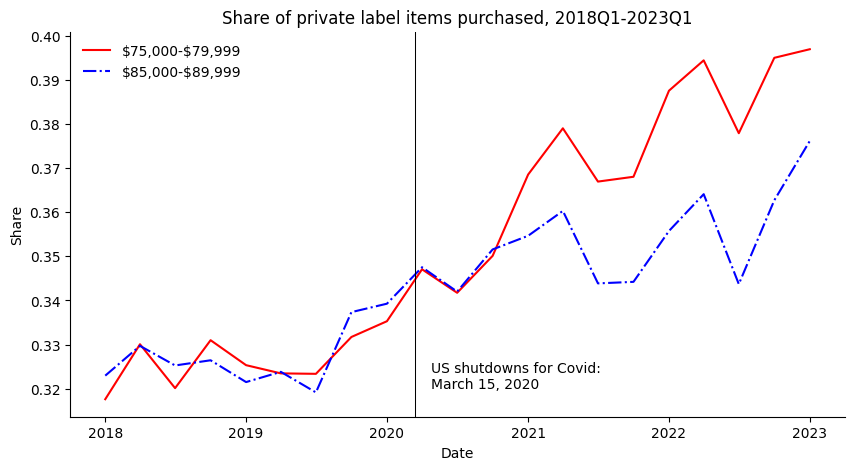

In [12]:
privatelabel_data.set_index(['income', 'date'], inplace=True)

pricesrise = dt.datetime.strptime('03/15/2020', '%m/%d/%Y')
labelloc = dt.datetime.strptime('4/25/2020', '%m/%d/%Y')
label = 'US shutdowns for Covid: \n' + pricesrise.strftime('%B %d, %Y')

# Create axes
fig, ax = plt.subplots(figsize=(10, 5)) 
ax.set_title("Share of private label items purchased, 2018Q1-2023Q1")
ax.set_xlabel("Date")
ax.set_ylabel("Share")

ax.plot(privatelabel_data.loc['$75000-$79999'].index, privatelabel_data.loc['$75000-$79999', 'share_privatelabel'], color='red', label='\$75,000-\$79,999')
ax.plot(privatelabel_data.loc['$85000-$89999'].index, privatelabel_data.loc['$85000-$89999', 'share_privatelabel'], color='blue', linestyle='-.', label='\$85,000-\$89,999')

ax.axvline(x=pricesrise, color='black', linewidth=0.75)  
ax.text(labelloc, 0.32, label)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.legend(frameon=False)  

plt.show()

##### We notice that around the time that grocery prices began to rise around the end of 2020, the households that earned less money began purchasing more private label items because these items cost less. Buying more private label items (i.e. cheaper items containing the same ingredients) can be one way that households "trade down" during a recession. When wages are decreasing and costs of living are increasing, households tend to purchase less costly goods to make their disposable income go further. 

##### Notice that these are relatively rich households in the context of Canada (median income in 2020 was \$40,630). It's possible that if even richer households are trading down during the pandemic, that aggregate inflation series based on scanner data are under-estimating the true inflation felt by households since all observations are conditional on a household choosing to buy these goods. 

### Part (c):

Compute the difference between the private-label shares for the two income groups
$$ \text{diff}_t=\text{share}_{75-79,t} - \text{share}_{85-89,t}.$$

\[I would reshape the DataFrame to make this calculation easier to code.\] 

Report the average difference for the period 2018-Q1 to 2020-Q4 and the period 2021-Q1 to 2023-Q1. Report them as   
```
The average difference between the share for the lower-income group and the higher-income group is X.XX before 2021 and X.XX after 2021.
```

In [13]:
# Unstack the data set on income 
privatelabel_data = privatelabel_data.unstack('income')
privatelabel_data[('share_privatelabel', 'difference')] = privatelabel_data[('share_privatelabel', '$75000-$79999')]-privatelabel_data[('share_privatelabel', '$85000-$89999')]

# Calculate the pre-period difference and post-period difference 
pre = privatelabel_data.loc[:'2021-01-01',('share_privatelabel', 'difference')].mean()
post = privatelabel_data.loc['2021-01-01':,('share_privatelabel', 'difference')].mean()

# Print a nicely formatted sentence
f'The average difference between the share for the lower-income group and the higher-income group is {pre:.2f} before 2021 and {post:.2f} after 2021.'


'The average difference between the share for the lower-income group and the higher-income group is 0.00 before 2021 and 0.03 after 2021.'